# $Modeling$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import wrangle_mall as w
from pydataset import data

# 1. Clustering with the Iris Dataset

### Using this lesson as a guide, perform clustering on the iris dataset.






In [2]:
df = data('iris')

In [3]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
df['sepal_area']= df.sepal_width* df.sepal_length

In [5]:
df['petal_area']= df.petal_width* df.petal_length

In [6]:
def split_df(df):
    ''' split_mall_customers splits_df  into train, validate and test '''
    # split the data
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
    
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=123)
    
    return train, validate, test

In [7]:
train, validate, test = split_df(df)

### a. Choose features other than the ones used in the lesson.

In [8]:
X = train[['sepal_area', 'petal_area']]
X

,sepal_area,petal_area
57,20.79,7.52
41,17.50,0.39
71,18.88,8.64
24,16.83,0.85
140,21.39,11.34
150,17.70,9.18
69,13.64,6.75
65,16.24,4.68
99,12.75,3.30
82,13.20,3.70


In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)


array([0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2,
       1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0,
       2, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

In [10]:
train['cluster'] = kmeans.predict(X)
train

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
57,6.3,3.3,4.7,1.6,versicolor,20.79,7.52,0
41,5.0,3.5,1.3,0.3,setosa,17.50,0.39,1
71,5.9,3.2,4.8,1.8,versicolor,18.88,8.64,0
24,5.1,3.3,1.7,0.5,setosa,16.83,0.85,1
140,6.9,3.1,5.4,2.1,virginica,21.39,11.34,0
150,5.9,3.0,5.1,1.8,virginica,17.70,9.18,2
69,6.2,2.2,4.5,1.5,versicolor,13.64,6.75,2
65,5.6,2.9,3.6,1.3,versicolor,16.24,4.68,2
99,5.1,2.5,3.0,1.1,versicolor,12.75,3.30,2
82,5.5,2.4,3.7,1.0,versicolor,13.20,3.70,2


### b. Visualize the results of your clustering.

In [11]:
kmeans.cluster_centers_


array([[21.27541667, 11.0475    ],
       [17.10615385,  0.39692308],
       [15.57882353,  6.22441176]])

In [12]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids


,sepal_area,petal_area
0,21.275417,11.047500
1,17.106154,0.396923
2,15.578824,6.224412


In [13]:
train.groupby('cluster')['sepal_area', 'petal_area'].mean()


/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_1256/2401974884.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('cluster')['sepal_area', 'petal_area'].mean()


,sepal_area,petal_area
cluster,,
0,21.275417,11.047500
1,17.106154,0.396923
2,15.578824,6.224412


Text(0.5, 1.0, 'Visualizing Cluster Centers')

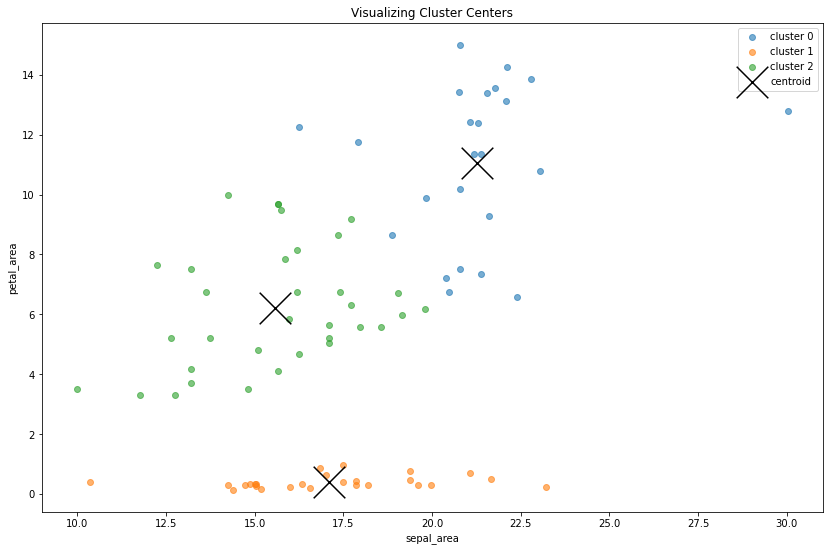

In [14]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.sepal_area, subset.petal_area, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(x='sepal_area', y='petal_area', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.ylabel('petal_area')
plt.xlabel('sepal_area')
plt.title('Visualizing Cluster Centers')

### c. Use the elbow method to visually select a good value for k.

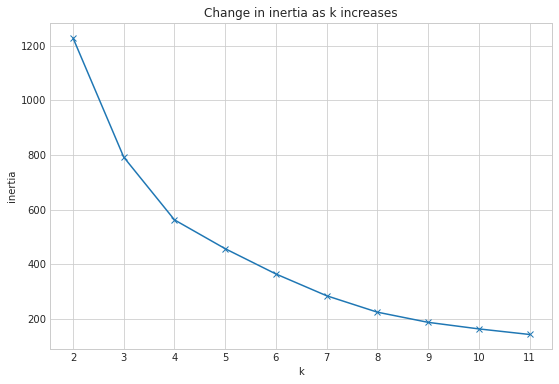

In [15]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

K numbers 2, 3, 4,5

# d. Repeat the clustering, this time with 3 different features.

 Choose features other than the ones used in the lesson.

In [16]:
X2 = train[['petal_length', 'petal_width','petal_area']]
X2

,petal_length,petal_width,petal_area
57,4.7,1.6,7.52
41,1.3,0.3,0.39
71,4.8,1.8,8.64
24,1.7,0.5,0.85
140,5.4,2.1,11.34
150,5.1,1.8,9.18
69,4.5,1.5,6.75
65,3.6,1.3,4.68
99,3.0,1.1,3.30
82,3.7,1.0,3.70


In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X2)

kmeans.predict(X2)


array([0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0,
       0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2], dtype=int32)

In [18]:
train['cluster2'] = kmeans.predict(X2)
train

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster,cluster2
57,6.3,3.3,4.7,1.6,versicolor,20.79,7.52,0,0
41,5.0,3.5,1.3,0.3,setosa,17.50,0.39,1,1
71,5.9,3.2,4.8,1.8,versicolor,18.88,8.64,0,0
24,5.1,3.3,1.7,0.5,setosa,16.83,0.85,1,1
140,6.9,3.1,5.4,2.1,virginica,21.39,11.34,0,2
150,5.9,3.0,5.1,1.8,virginica,17.70,9.18,2,2
69,6.2,2.2,4.5,1.5,versicolor,13.64,6.75,2,0
65,5.6,2.9,3.6,1.3,versicolor,16.24,4.68,2,0
99,5.1,2.5,3.0,1.1,versicolor,12.75,3.30,2,0
82,5.5,2.4,3.7,1.0,versicolor,13.20,3.70,2,0


### b. Visualize the results of your clustering.

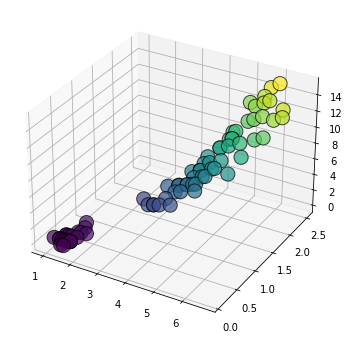

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = train.petal_length
y = train.petal_width
z = train.petal_area

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

In [20]:
kmeans.cluster_centers_


array([[ 4.31714286,  1.35428571,  5.93171429],
       [ 1.48076923,  0.26153846,  0.39692308],
       [ 5.65217391,  2.06956522, 11.7026087 ]])

In [21]:
centroids2 = pd.DataFrame(kmeans.cluster_centers_, columns=X2.columns)
centroids2


,petal_length,petal_width,petal_area
0,4.317143,1.354286,5.931714
1,1.480769,0.261538,0.396923
2,5.652174,2.069565,11.702609


In [22]:
train.groupby('cluster2')['petal_length', 'petal_width','petal_area'].mean()


/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_1256/1406286170.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('cluster2')['petal_length', 'petal_width','petal_area'].mean()


,petal_length,petal_width,petal_area
cluster2,,,
0,4.317143,1.354286,5.931714
1,1.480769,0.261538,0.396923
2,5.652174,2.069565,11.702609


### c. Use the elbow method to visually select a good value for k.

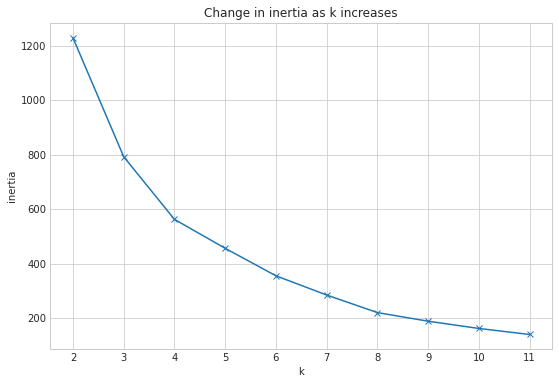

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

K numbers 2, 3, 4,5

Text(0.5, 1.0, 'Visualizing Cluster Centers')

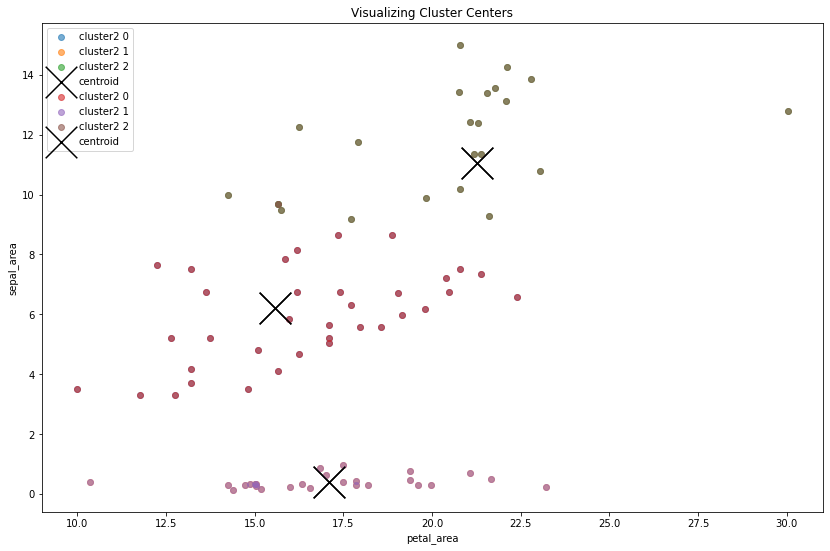

In [24]:
plt.figure(figsize=(14, 9))

for cluster2, subset in train.groupby('cluster2'):
    plt.scatter(subset.sepal_area, subset.petal_area, label='cluster2 ' + str(cluster2), alpha=.6)

centroids.plot.scatter(x='sepal_area', y='petal_area', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.ylabel('sepal_area')
plt.xlabel('petal_area')
plt.title('Visualizing Cluster Centers')

for cluster2, subset in train.groupby('cluster2'):
    plt.scatter(subset.sepal_area, subset.petal_area, label='cluster2 ' + str(cluster2), alpha=.6)

centroids.plot.scatter(x='sepal_area', y='petal_area', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.ylabel('sepal_area')
plt.xlabel('petal_area')
plt.title('Visualizing Cluster Centers')

# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [25]:
mall = w.get_mall_df()
mall

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
trainmall, validatemall, testmall = split_df(mall)

In [27]:
X = trainmall[['age', 'annual_income']]


In [28]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 3, 0, 2, 3, 1,
       0, 0, 0, 3, 2, 2, 3, 1, 1, 0, 2, 1, 3, 0, 2, 1, 2, 0, 2, 3, 2, 2,
       2, 1, 2, 2, 3, 1, 0, 2, 2, 2, 1, 0, 2, 2, 0, 3, 2, 3, 1, 2, 2, 0,
       2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 3, 1, 1, 0, 0,
       1, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 3, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       2, 1], dtype=int32)

In [29]:
trainmall['cluster'] = kmeans.predict(X)

In [30]:
kmeans.cluster_centers_

array([[ 56.        ,  50.84848485],
       [ 26.76      ,  28.32      ],
       [ 31.93023256,  72.8372093 ],
       [ 37.54545455, 111.81818182]])

In [31]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,56.000000,50.848485
1,26.760000,28.320000
2,31.930233,72.837209
3,37.545455,111.818182


Text(0.5, 1.0, 'Visualizing Cluster Centers')

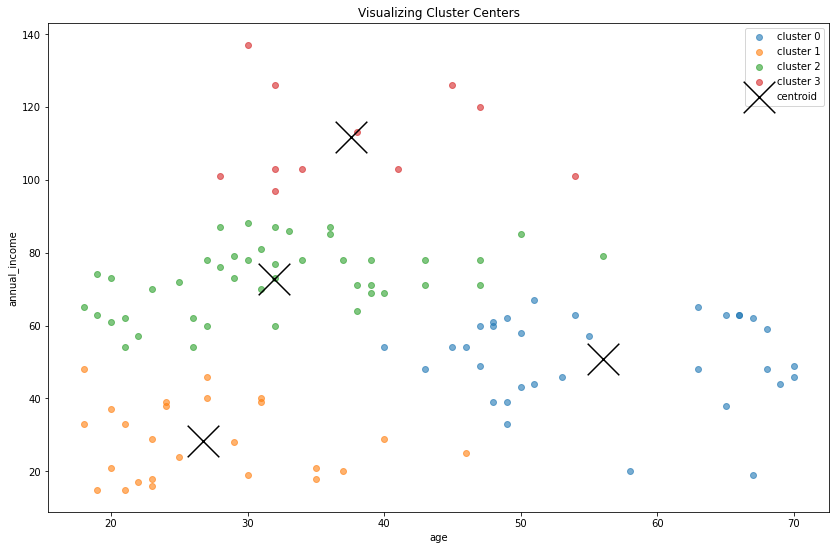

In [32]:
plt.figure(figsize=(14, 9))

for cluster, subset in trainmall.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(x='age', y='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

In [33]:
trainmall.groupby('cluster')['age', 'annual_income'].mean()


/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_1256/3492328827.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trainmall.groupby('cluster')['age', 'annual_income'].mean()


,age,annual_income
cluster,,
0,56.000000,50.848485
1,26.760000,28.320000
2,31.930233,72.837209
3,37.545455,111.818182


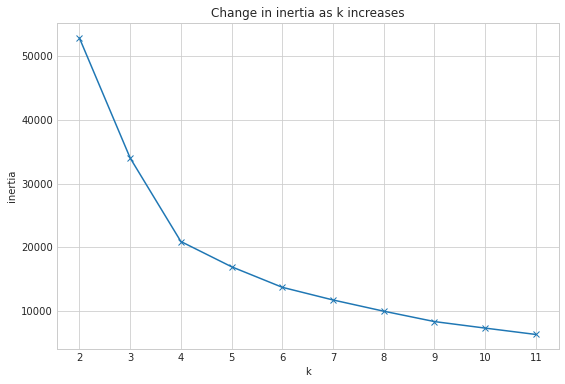

In [34]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

**K numbers 2, 3, 4**

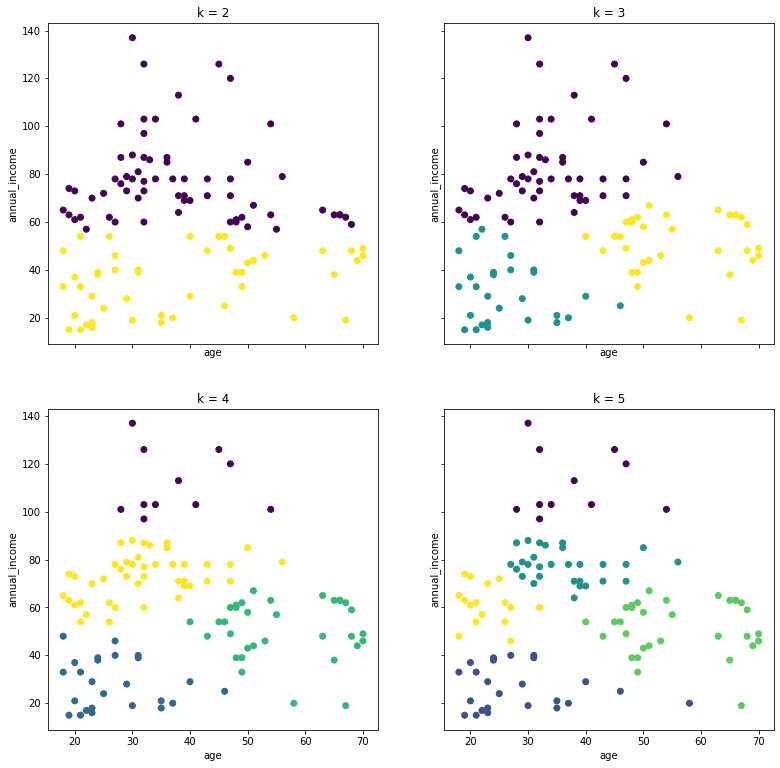

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')


# 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [39]:
scaledmall = w.mall_scaler(trainmall)

In [40]:
X2 = scaledmall[['age', 'annual_income']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X2)
scaledmall['cluster2'] = kmeans.predict(X2)
centroids2 = pd.DataFrame(kmeans.cluster_centers_, columns=X2.columns)

centroids2

,age,annual_income
0,0.124399,0.182377
1,0.270362,0.597396
2,0.924451,0.279274
3,0.558293,0.358863


Text(0.5, 1.0, 'Visualizing Cluster Centers')

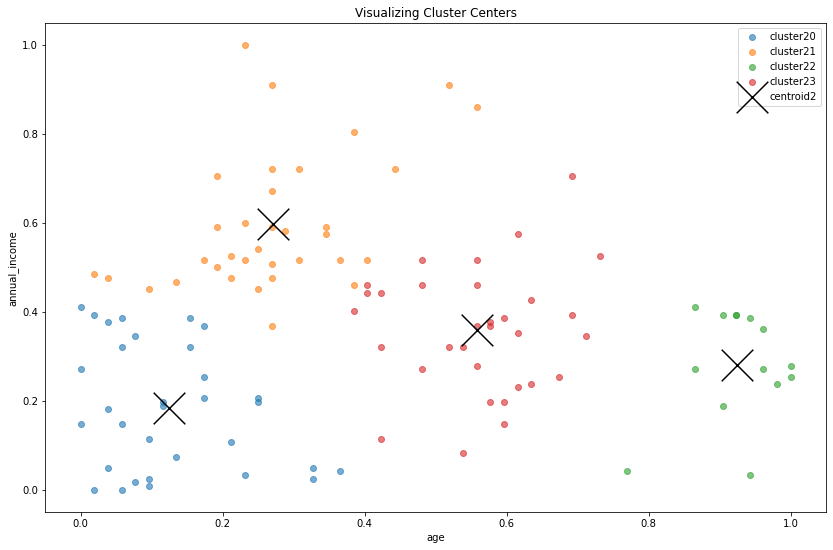

In [41]:
plt.figure(figsize=(14, 9))

for cluster2, subset in scaledmall.groupby('cluster2'):
    plt.scatter(subset.age, subset.annual_income, label='cluster2' + str(cluster2), alpha=.6)

centroids2.plot.scatter(x='age', y='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid2')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

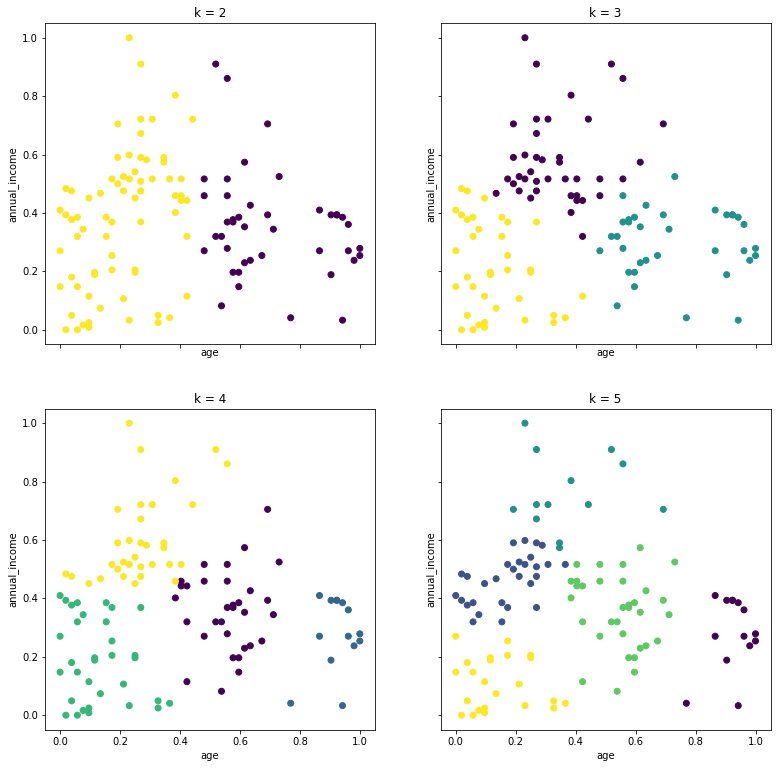

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters2 = KMeans(k).fit(X2).predict(X2)
    ax.scatter(X2.age, X2.annual_income, c=clusters2)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')